# Feature Selection for id-Features

## import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

## read data

In [2]:
identity_dataframe = pd.read_csv('data/train_identity.csv')
identity_dataframe.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
transaction_dataframe = pd.read_csv('data/train_transaction.csv')
transaction_dataframe.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
is_fraud_dataframe = transaction_dataframe[['TransactionID', 'isFraud']]
is_fraud_dataframe.head()

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0


In [5]:
dataframe = identity_dataframe.merge(is_fraud_dataframe, on='TransactionID')
dataframe.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,F,F,T,T,desktop,Windows,0
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,F,F,T,T,desktop,NaN,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,0


## remove irrelevant column (TransactionID)

In [6]:
dataframe = dataframe.drop('TransactionID', axis=1)
dataframe.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,0
2,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,F,F,T,T,desktop,Windows,0
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,F,F,T,T,desktop,NaN,0
4,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,0


## check the percentage of NaNs in each column

In [7]:
for column in dataframe.columns:
    num_nans = dataframe[column].isna().sum()
    print('percentage of NaNs for {}: {:.3f}'.format(
        column, 
        num_nans / len(dataframe) * 100
    ))

percentage of NaNs for id_01: 0.000
percentage of NaNs for id_02: 2.330
percentage of NaNs for id_03: 54.016
percentage of NaNs for id_04: 54.016
percentage of NaNs for id_05: 5.108
percentage of NaNs for id_06: 5.108
percentage of NaNs for id_07: 96.426
percentage of NaNs for id_08: 96.426
percentage of NaNs for id_09: 48.052
percentage of NaNs for id_10: 48.052
percentage of NaNs for id_11: 2.257
percentage of NaNs for id_12: 0.000
percentage of NaNs for id_13: 11.726
percentage of NaNs for id_14: 44.504
percentage of NaNs for id_15: 2.252
percentage of NaNs for id_16: 10.326
percentage of NaNs for id_17: 3.372
percentage of NaNs for id_18: 68.722
percentage of NaNs for id_19: 3.408
percentage of NaNs for id_20: 3.447
percentage of NaNs for id_21: 96.423
percentage of NaNs for id_22: 96.416
percentage of NaNs for id_23: 96.416
percentage of NaNs for id_24: 96.709
percentage of NaNs for id_25: 96.442
percentage of NaNs for id_26: 96.420
percentage of NaNs for id_27: 96.416
percentage 

## remove columns with a lot of NaNs

In [8]:
# keep columns with less than 60% NaNs
dataframe = dataframe.loc[:, dataframe.isna().mean() < 0.6]
dataframe.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.0,NotFound,...,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,0
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,...,NaN,NaN,NaN,F,F,T,T,desktop,Windows,0
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.0,NotFound,...,NaN,NaN,NaN,F,F,T,T,desktop,NaN,0
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,NotFound,...,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,0


## check column datatypes

In [9]:
dataframe.dtypes

id_01         float64
id_02         float64
id_03         float64
id_04         float64
id_05         float64
id_06         float64
id_09         float64
id_10         float64
id_11         float64
id_12          object
id_13         float64
id_14         float64
id_15          object
id_16          object
id_17         float64
id_19         float64
id_20         float64
id_28          object
id_29          object
id_30          object
id_31          object
id_32         float64
id_33          object
id_34          object
id_35          object
id_36          object
id_37          object
id_38          object
DeviceType     object
DeviceInfo     object
isFraud         int64
dtype: object

## define utility function to reduce memory usage

In [10]:
def reduce_mem_usage(df, verbose=True):
    """
    Reduce dataframe size

    params:
    - df: dataframe to reduce the size of

    return:
    - dataframe of reduced size
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'float128']
    start_mem = df.memory_usage().sum() / 1024**2    

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float64).min and c_max < np.finfo(np.float64).max:
                    df[col] = df[col].astype(np.float64)
                elif c_min > np.finfo(np.float128).min and c_max < np.finfo(np.float128).max:
                    df[col] = df[col].astype(np.float128)
                    
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose: 
        print(
            'Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(
            end_mem, 100 * (start_mem - end_mem) / start_mem
        ))

    return df

## reduce memory usage

In [11]:
dataframe = reduce_mem_usage(dataframe)

Mem. usage decreased to 22.15 Mb (37.1% reduction)


## define function for drawing correlation heatmap

In [12]:
def draw_correlation_heatmap(df):
    """
    params:
    - df: dataframe of which correlation heatmap is drawn
    """
    fig, ax = plt.subplots(figsize=(10,10))

    sns.heatmap(
        df.corr(), 
        vmax=1.0, 
        center=0, 
        fmt='.2f',
        square=True, 
        linewidths=0.5, 
        annot=True, 
        cbar_kws={'shrink': .70},
    )

    plt.show()

## draw correlation heatmap to check for correlated features

- correlated features may affect classifier performance

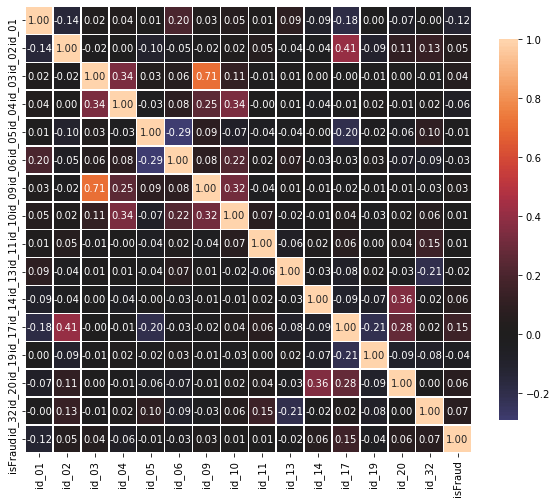

In [13]:
draw_correlation_heatmap(dataframe)

- no correlation coefficient above 0.90; should be fine

## convert object columns to string columns

In [14]:
for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        continue

    dataframe[column]= dataframe[column].astype(str)

## do label encoding for string values, so that RFE works later

In [15]:
le = LabelEncoder()

for column in dataframe.columns:
    if dataframe[column].dtype != 'object':
        continue

    dataframe[column] = le.fit_transform(dataframe[column])

## imputation

- for strings, fill with most common occuring values
- for numbers, fill with interquartile mean

In [16]:
for column in dataframe.columns:
    if dataframe[column].dtype == 'object':
        dataframe[column] = dataframe[column].fillna(dataframe[column].mode())
    else:
        dataframe[column] = dataframe[column].fillna(dataframe[column].quantile().mean())

## do Recursive Feature Elimination with Cross Validation

- to select most important features

In [17]:
%%time

no_fraud_column_dataframe = dataframe.drop('isFraud', axis=1)
is_fraud_data = dataframe['isFraud']

# SGDClassifier gives inconsistent results, unlike RandomForestClassifier
rf_classifier = RandomForestClassifier(n_jobs=2)
rfecv = RFECV(rf_classifier, scoring='accuracy', n_jobs=2)

rfecv.fit(no_fraud_column_dataframe, is_fraud_data)

CPU times: user 8min 22s, sys: 1.61 s, total: 8min 24s
Wall time: 18min 3s


RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=2,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=2, scoring='accuracy', step=1,
      verbose=0)

In [18]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


## define function to plot accuracy vs number of features

In [19]:
def plot_acc_vs_num_features(grid_scores, method_used):
    plt.figure(figsize=(16, 9))
    plt.title(method_used, fontsize=18, fontweight='bold', pad=20)

    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)

    plt.plot(
        range(1, len(grid_scores) + 1), 
        grid_scores, 
        color='#303F9F', 
        linewidth=3,
    )

    plt.show()

## plot line chart of accuracy vs number of features

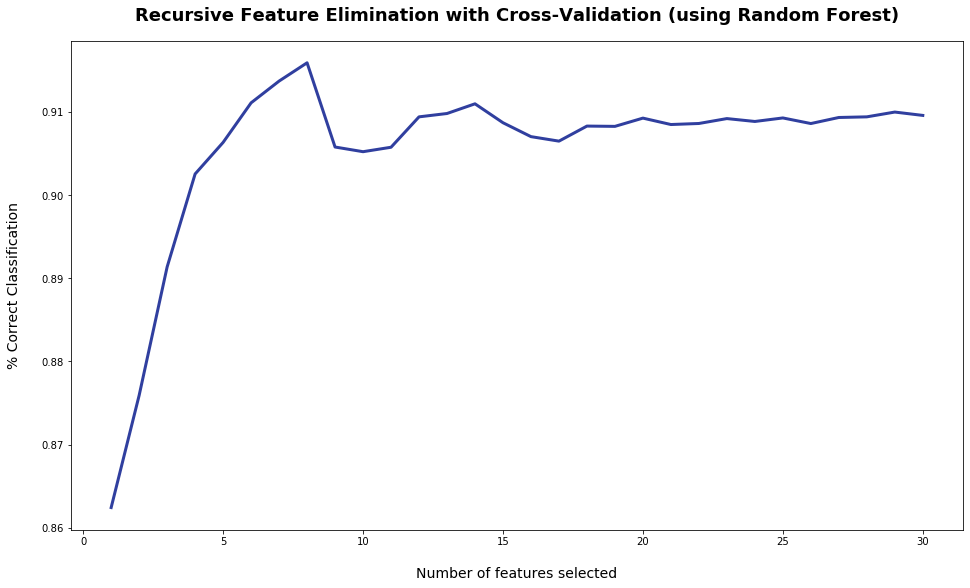

In [20]:
plot_acc_vs_num_features(
    rfecv.grid_scores_, 
    'Recursive Feature Elimination with Cross-Validation (using Random Forest)', 
)

## show feature ranking

In [21]:
for column, rank in zip(no_fraud_column_dataframe.columns, rfecv.ranking_):
    print(f'feature: {column} rank: {rank}')

feature: id_01 rank: 1
feature: id_02 rank: 1
feature: id_03 rank: 12
feature: id_04 rank: 19
feature: id_05 rank: 1
feature: id_06 rank: 1
feature: id_09 rank: 6
feature: id_10 rank: 22
feature: id_11 rank: 16
feature: id_12 rank: 15
feature: id_13 rank: 2
feature: id_14 rank: 8
feature: id_15 rank: 14
feature: id_16 rank: 5
feature: id_17 rank: 7
feature: id_19 rank: 1
feature: id_20 rank: 1
feature: id_28 rank: 20
feature: id_29 rank: 10
feature: id_30 rank: 3
feature: id_31 rank: 1
feature: id_32 rank: 21
feature: id_33 rank: 4
feature: id_34 rank: 13
feature: id_35 rank: 17
feature: id_36 rank: 23
feature: id_37 rank: 18
feature: id_38 rank: 9
feature: DeviceType rank: 11
feature: DeviceInfo rank: 1


## keep most important features

In [26]:
# https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
most_important_features = no_fraud_column_dataframe.drop(
    no_fraud_column_dataframe.columns[np.where(rfecv.support_ == False)[0]], 
    axis=1
)

## plot bar chart for feature importance

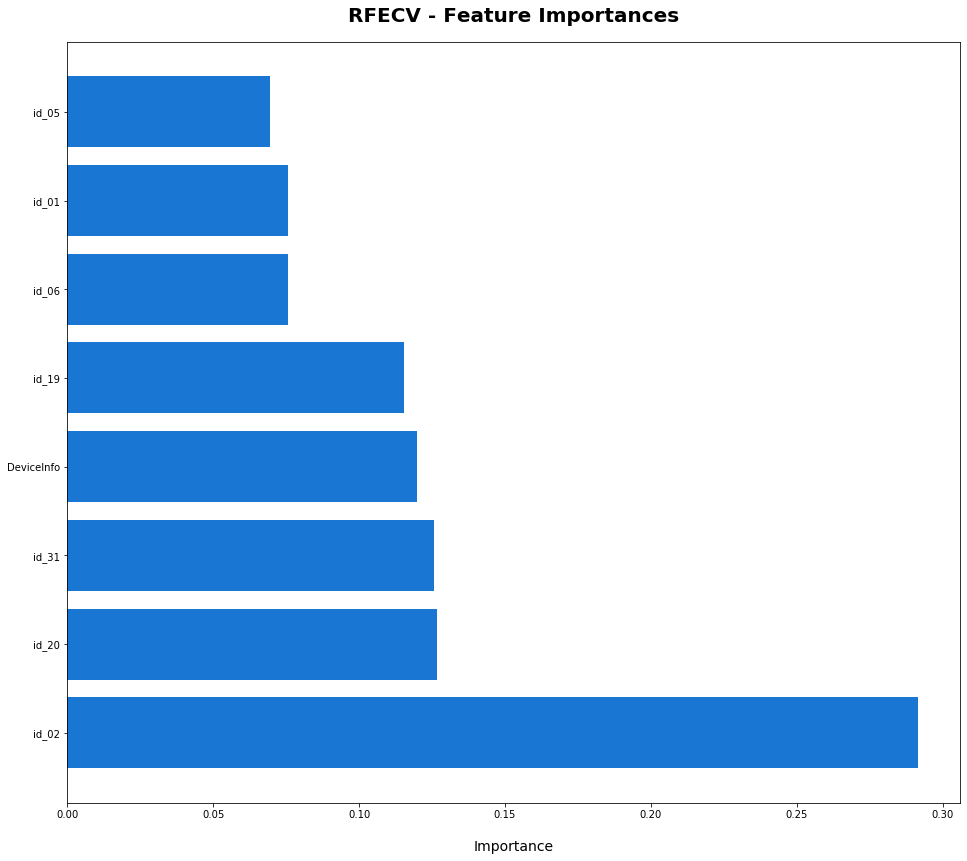

In [27]:
# https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
dset = pd.DataFrame()
dset['attr'] = most_important_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

## TODO: discuss result